In [2]:
#-----------------------------------------------------
# Manipulação e Plots
#-----------------------------------------------------
#Manipulação de dados
import pandas as pd
import numpy as np
from datetime import datetime

# Plots gráficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 2
from IPython.core.pylabtools import figsize
sns.set(font_scale = 2)
plt.style.use('seaborn-whitegrid')
from matplotlib import ticker
from scipy.stats import norm
formatter = ticker.ScalarFormatter(useMathText=True)

# Imputar missing values e Normalização
from sklearn.preprocessing import Imputer, MinMaxScaler

#-----------------------------------------------------
# Esconder os erros 
import warnings
warnings.filterwarnings('ignore')

# Base de dados

Foi utilizado a base de dados do sistema consumidor referentes ao 1º e 2º semestres de 2018,
que é um canal para o registro de reclamações do consumidor sobre um produto ou serviço adquirido. O
serviço é de responsabilidade da Secretaria Nacional do Consumidor e os dados são disponibilizados
conforme o programa de dados abertos. Também foi utilizado o banco de dados do ibge a
fim de obter a latitude e longitude de cada município do banco de dados utilizado.

[Consumidor GOV]( https://www.consumidor.gov.br/pages/principal/?1528432364969)

[Dados GOV](http://dados.gov.br/pagina/sobre)

[IBGE]( https://ww2.ibge.gov.br/home/geociencias/geodesia/bdgpesq_googlemaps.php)

[GIT REF]( https://github.com/kelvins/Municipios-Brasileiros)

[MINERANDODADOS REF]( http://minerandodados.com.br/index.php/2017/05/30/7-tipos-graficos-cientista-de-dados/)

[ANEEL]( http://www.aneel.gov.br/aneel-essencial/-/asset_publisher/c4M6OIoMkLad/content/direitos-e-deveres-dos-consumidores-de-energia-eletrica?inheritRedirect=false)

[EDA]( https://en.wikipedia.org/wiki/Exploratory_data_analysis)

In [3]:
#lendo os arquivos
data = pd.read_csv('2018-1º semestre.csv',sep=';',encoding='latin1')
data2 = pd.read_csv('2018-2º semestre.csv',sep=';',encoding='latin1')
dataset = pd.concat([data,data2])

In [103]:
dataset[u'Sexo'].value_counts()

M    356591
F    253053
Name: Sexo, dtype: int64

In [105]:
dataset.groupby('Sexo')['Faixa Etária'].value_counts()

Sexo  Faixa Etária      
F     entre 31 a 40 anos     77093
      entre 21 a 30 anos     75281
      entre 41 a 50 anos     39823
      entre 51 a 60 anos     28990
      entre 61 a 70 anos     17726
      mais de 70 anos         7312
      até 20 anos             6828
M     entre 31 a 40 anos    122812
      entre 21 a 30 anos    118969
      entre 41 a 50 anos     53142
      entre 51 a 60 anos     29273
      entre 61 a 70 anos     16340
      até 20 anos             9604
      mais de 70 anos         6451
Name: Faixa Etária, dtype: int64

In [106]:
dataset['Grupo Problema'].value_counts()

Cobrança / Contestação    256003
Contrato / Oferta         101593
Vício de Qualidade         81697
Atendimento / SAC          70024
Informação                 68475
Entrega do Produto         28673
Saúde e Segurança           3179
Name: Grupo Problema, dtype: int64

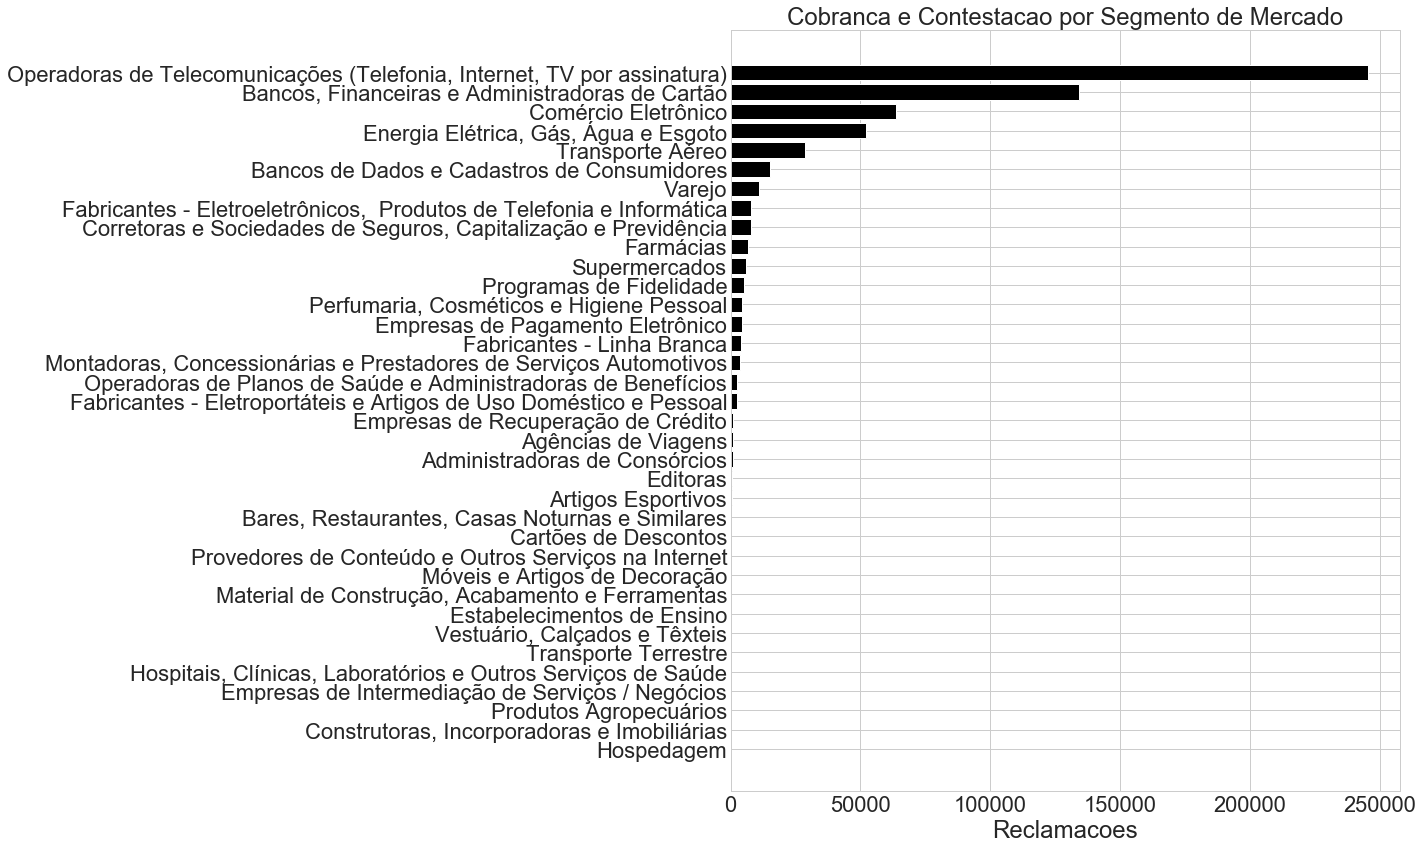

In [18]:
fig, ax = plt.subplots(figsize=(12,14))
y_pos = np.arange(len(dataset['Segmento de Mercado'].value_counts()))
values = dataset['Segmento de Mercado'].value_counts()
segmentos = dataset['Segmento de Mercado'].unique()
ax.barh(y_pos, values, align='center', color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamacoes')
ax.set_title('Cobranca e Contestacao por Segmento de Mercado')
plt.show()

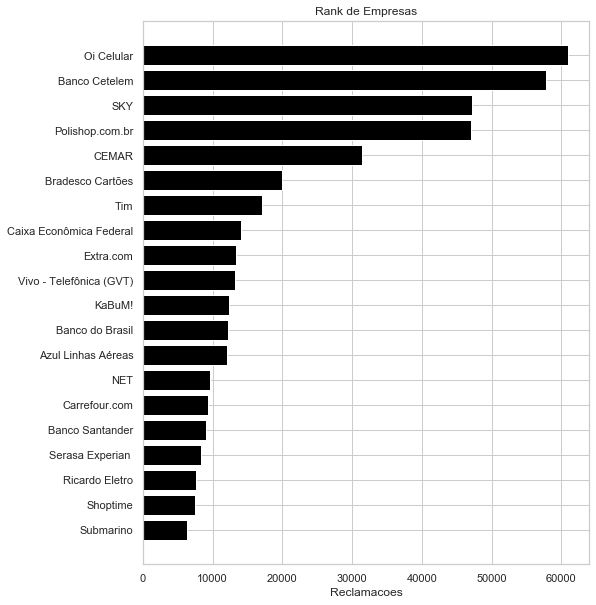

In [107]:
fig, ax = plt.subplots(figsize=(8,10))
y_pos = np.arange(len(dataset['Nome Fantasia'].value_counts()[:20]))
values = dataset['Nome Fantasia'].value_counts()[:20]
segmentos = dataset['Nome Fantasia'].unique()[:20]
ax.barh(y_pos, values, align='center', color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamacoes')
ax.set_title('Rank de Empresas')
plt.show()

* Energia Elétrica se encontra no top 5 
* dentre as empresas com mais reclamações -> CEMAR

# Elétricas

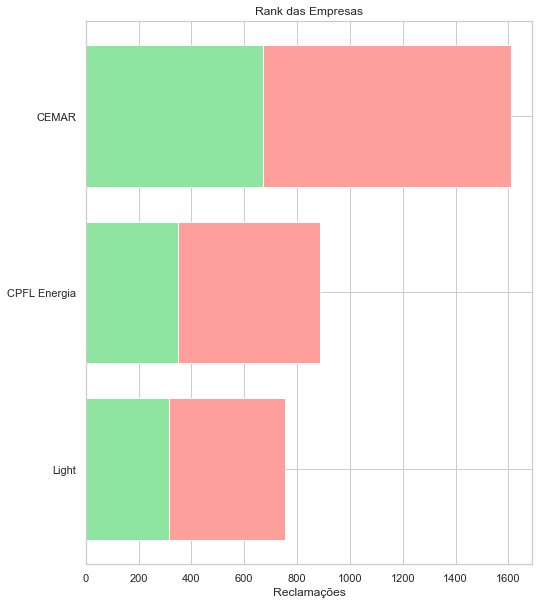

In [102]:
fig, ax = plt.subplots(figsize=(8,10))

segmento = dataset[dataset['Assunto']=='Energia Elétrica']
df = segmento[segmento[u'Avaliação Reclamação']==u'Não Resolvida']

y_pos = np.arange(len(segmento['Nome Fantasia'].value_counts()[:3]))
values = segmento['Nome Fantasia'].value_counts()[:3]
segmentos = segmento['Nome Fantasia'].unique()[:3]

y_pos2 = np.arange(len(df['Nome Fantasia'].value_counts()[:3]))
values2 = df['Nome Fantasia'].value_counts()[:3]
segmentos2 = df['Nome Fantasia'].unique()[:3]


ax.barh(y_pos, values, align='center', color='r')
ax.barh(y_pos2, values2, align='center', color='g')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamações')
ax.set_title('Rank das Empresas')
fig.savefig('rankempresas.png',dpi=350,transparent=True,bbox_inches='tight')
plt.show()

In [78]:
segmento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6313 entries, 4 to 306944
Data columns (total 20 columns):
Região                    6313 non-null object
UF                        6313 non-null object
Cidade                    6313 non-null object
Sexo                      6313 non-null object
Faixa Etária              6313 non-null object
Data Finalização          6313 non-null object
Tempo Resposta            6000 non-null float64
Nome Fantasia             6313 non-null object
Segmento de Mercado       6313 non-null object
Área                      6313 non-null object
Assunto                   6313 non-null object
Grupo Problema            6313 non-null object
Problema                  6313 non-null object
Como Comprou Contratou    6313 non-null object
Procurou Empresa          6313 non-null object
Respondida                6313 non-null object
Situação                  6313 non-null object
Avaliação Reclamação      6313 non-null object
Nota do Consumidor        3195 non-null floa

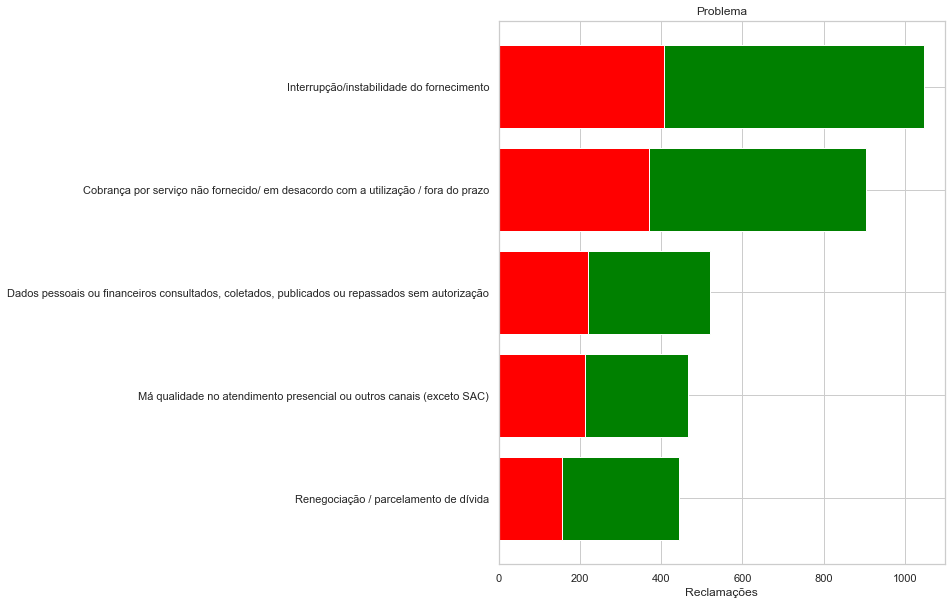

In [91]:
fig, ax = plt.subplots(figsize=(8,10))
df = segmento[segmento[u'Avaliação Reclamação']==u'Não Resolvida']

y_pos = np.arange(len(segmento['Problema'].value_counts()[:5]))
values = segmento['Problema'].value_counts()[:5]
segmentos = segmento['Problema'].unique()[:5]

y_pos2 = np.arange(len(df['Problema'].value_counts()[:5]))
values2 = df['Problema'].value_counts()[:5]
segmentos2 = df['Problema'].unique()[:5]


ax.barh(y_pos, values, align='center', color='green')
ax.barh(y_pos2, values2, align='center', color='red')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamações')
ax.set_title('Problema')
fig.savefig('problema.png',dpi=350,transparent=True,bbox_inches='tight')

plt.show()

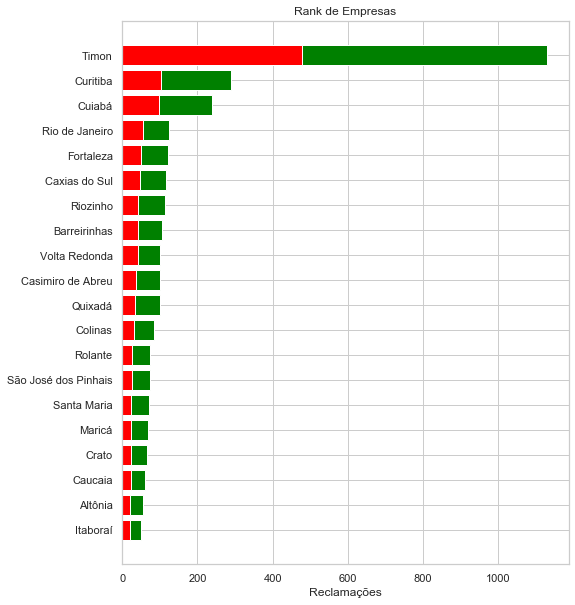

In [79]:
fig, ax = plt.subplots(figsize=(8,10))
df = segmento[segmento[u'Avaliação Reclamação']==u'Não Resolvida']

y_pos = np.arange(len(segmento['Cidade'].value_counts()[:20]))
values = segmento['Cidade'].value_counts()[:20]
segmentos = segmento['Cidade'].unique()[:20]

y_pos2 = np.arange(len(df['Cidade'].value_counts()[:20]))
values2 = df['Cidade'].value_counts()[:20]
segmentos2 = df['Cidade'].unique()[:20]


ax.barh(y_pos, values, align='center', color='green')
ax.barh(y_pos2, values2, align='center', color='red')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamações')
ax.set_title('Rank de Empresas')
plt.show()

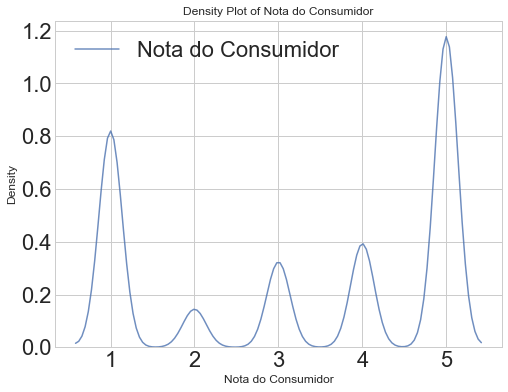

In [21]:
# Plotando a distribuição por categoria 
figsize(8, 6)
sns.kdeplot(dataset['Nota do Consumidor'].dropna(), shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Nota do Consumidor', size = 12); plt.ylabel('Density', size = 12); 
plt.title('Density Plot of Nota do Consumidor', size = 12);

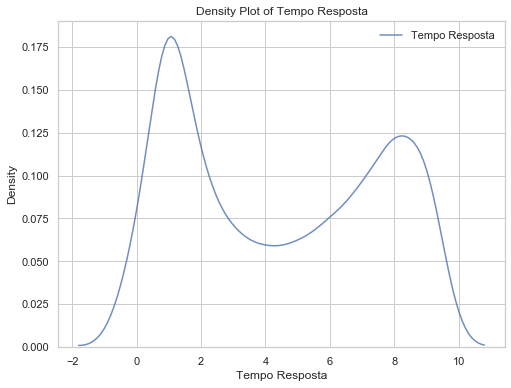

In [38]:
# Plotando a distribuição por categoria 
figsize(8, 6)
a= segmento[segmento['Tempo Resposta']<10]
sns.kdeplot(a['Tempo Resposta'], shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Tempo Resposta', size = 12); plt.ylabel('Density', size = 12); 
plt.title('Density Plot of Tempo Resposta', size = 12);

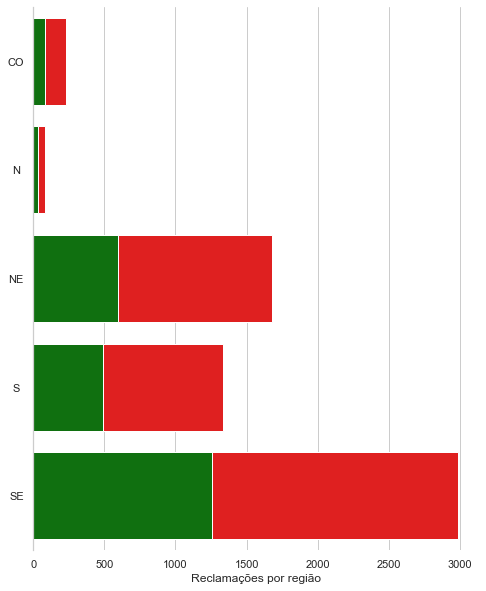

In [99]:

x = segmento.groupby(u'Região')[u'Região'].count()
df = segmento[segmento[u'Região'].isin(x.keys())]
df = df[df[u'Avaliação Reclamação']==u'Não Resolvida']
x1 = df.groupby(u'Região')[u'Região'].count()

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 10))
sns.set_color_codes("pastel")
sns.barplot(x=x.values, y=x.keys(), label="Total de Reclamações", color="red")
sns.barplot(x=x1.values, y=x1.keys(),label="Reclamações não resolvidas", color="green")
#ax.legend(loc="best", frameon=True)
ax.set(ylabel="", xlabel="Reclamações por região")
sns.despine(left=False, bottom=True)
f.savefig('Regiao.png',dpi=350,transparent=True,bbox_inches='tight')


# Plot geográfico utilizando biblio folium

In [26]:
municipios = pd.read_excel('municipiosBrasil.xls',encoding='latin1')

In [69]:
import unicodedata
import re
def remover_acentos(txt):
    nfkd = unicodedata.normalize('NFKD', txt)
    palavraSemAcento = u"".join([c for c in nfkd if not unicodedata.combining(c)])
# Usa expressão regular para retornar a palavra apenas com números, letras e espaço
    palavraSemAcento = re.sub('[^a-zA-Z0-9 \\\]', '', palavraSemAcento)
    palavraSemAcento = str(palavraSemAcento).upper()
    return palavraSemAcento

segmento['Cidade2'] = segmento['Cidade'].apply(remover_acentos)


In [70]:
import folium
from folium import plugins
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=5,tiles='Stamen Terrain')
folium.

In [73]:
coordenadas=[]
for cid,uf in zip(segmento.Cidade2[:10000],segmento.UF[:10000]):
    cidadeUf = cid+' - '+uf
    lat = municipios[municipios['Mun/UF'] == cidadeUf]['LATITUDE'].values
    long = municipios[municipios['Mun/UF'] == cidadeUf]['LONGITUDE'].values
    if lat != '' and long != '':
        lat = float(str(lat).replace('[','').replace(']','').replace(' ',','))
        long = float(str(long).replace('[','').replace(']','').replace(' ',','))
        coordenadas.append([lat,long])
mapa.add_child(plugins.HeatMap(coordenadas))

mapa

In [33]:
mapa.save('mapa-consumidor.html')